# Materials associated with the paper: 

Cao, W., Williams, S., Flament, N., Zahirovic, S., Scotese, C., and Müller, R. D., 2018. Paleolatitudinal distribution of lithologic indicators of climate in a paleogeographic framework. Geological Magazine, 1-24. doi:10.1017/S0016756818000110.

### This Jupyter notebook is used to generate Figure 12 for the paper.

The code in this notebook is written in Python 2.7. It utilises the standard scientific Python modules including numpy, pandas, mpl_toolkits, matplotlib, os, and the open source module 'pygplates' which provides a Python API to the GPlates software (https://www.gplates.org/).

## Import Python modules

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import pandas as pd    
from matplotlib import colors
from matplotlib import legend
import pygplates
from matplotlib.patches import Polygon
import glob, os
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

## Figure 11

### Read the data and make the figure

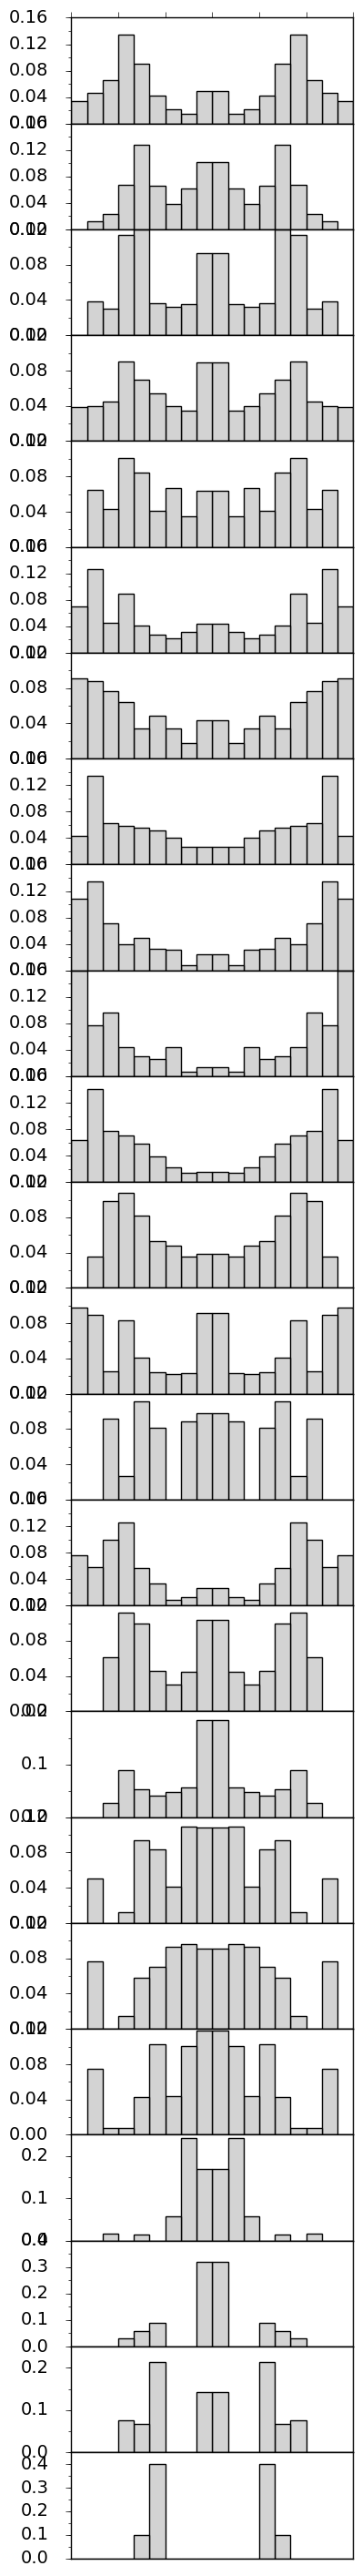

In [2]:
#######################
# Matthews2016 model, bin size: 10 degree
# Coals
data_raw_Matthews2016 = pd.read_excel('../Data/Lithologic_Data/9_3_LithData_TwoBiasRemoved_CorrectedBeforeFlipping_Doubled/Coals_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize10_Normalised.xlsx')
data_Matthews2016_BinningSize10 = np.array(data_raw_Matthews2016)

fig, axes = plt.subplots(nrows=24, ncols=1,figsize=(4, 36))

for i in np.arange(0,24,1):
    
    ################################################
    # binning size: 10 degree
    yedges_binningsize10 = np.arange(-90, 91, 10) #latitude, specify the bin size   

    # Coals, evaporites and glacial deposits
    axes[23-i].bar(np.array(yedges_binningsize10[:-1]), data_Matthews2016_BinningSize10[:,i], width=10, color='lightgrey') #,linewidth=0.5, edgecolor='grey',alpha=0.4
    
    axes[23-i].set_xticks(np.arange(-90, 91, 30))
    axes[23-i].set_xticklabels([])
    axes[23-i].set_xlim((90,-90))
    axes[23-i].set_ylim(ymin=0)
    axes[23-i].xaxis.set_tick_params(direction='out') #labelsize=12,
    #plt.setp(axes[i].get_xticklabels(), fontsize=12.) #,rotation=50

    axes[23-i].yaxis.set_tick_params(labelsize=14,direction='out') #
    axes[23-i].xaxis.set_ticks_position('top') # bottom
    axes[23-i].set_yticks(axes[23-i].get_yticks()[::2]) # set the major ticks
    interval = np.diff(axes[23-i].get_yticks())[0]
    axes[23-i].yaxis.set_minor_locator(MultipleLocator(interval/2))
    axes[23-i].tick_params(which = 'both', direction = 'out') # if only want to set y-axis: axes[1,2].yaxis.set_tick_params(labelsize=12,direction='out')
    axes[23-i].yaxis.set_ticks_position('left')

fig.subplots_adjust(hspace=0.00)
plt.savefig('Output/Fig_11a.pdf')
plt.show()


## Figure 12a

### Read the data

In [3]:
data_peaks = pd.read_excel('../Data/Fig12/PeakLatitude_EachMap.xlsx')
time = np.zeros(len(data_peaks['FromAge'])*2)
time[::2] = data_peaks['FromAge']
time[1::2] = data_peaks['ToAge']
print time

# coal peaks
data_C = np.zeros(len(data_peaks['Final_Coals'])*2)
data_C[::2] = np.asarray(data_peaks['Final_Coals'])
data_C[1::2] = np.asarray(data_peaks['Final_Coals'])

# Confidence interval = 50%
Boundary_50CI_1 = np.zeros(24)
Boundary_50CI_2 = np.zeros(24)
Boundary_50CI_3 = np.zeros(24)
Boundary_50CI_4 = np.zeros(24)

for i in np.arange(0,24,1):
    
    Coals_raw = pd.read_csv('../Data/HDR/9_3_Coals_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize5_Normalised/hdr_'+str(i)+'.csv')
    Coals = np.array(Coals_raw)
    Boundary_50CI_1[i] = -1*Coals[2,1]
    
    try:
        if np.float16(Coals[2,2]) != np.float16(-1*Coals[2,1]):
            Boundary_50CI_2[i] = -1*Coals[2,2]
    except IndexError:
        print 'sorry, no data'
        
    try:
        if np.float16(Coals[2,3]) != np.float16(-1*Coals[2,2]) and Coals[2,3] != None:
            Boundary_50CI_3[i]= -1*Coals[2,3]
    except IndexError:
        print 'sorry, no data'

print Boundary_50CI_3


Boundary_50CI_4 = np.array([0,0,0,0,0,
                       0,0,0,0,0,
                       0,0,0,0,0,
                       0,36.434,0,0,0,
                       0,0,0,0])
print Boundary_50CI_4


[ 419.   393.   393.   388.   388.   383.   383.   359.   359.   331.   331.
  323.   323.   307.   307.   299.   299.   290.   290.   252.   252.   247.
  247.   237.   237.   201.   201.   164.   164.   145.   145.   113.   113.
   89.8   89.8   66.    66.    56.    56.    47.8   47.8   33.9   33.9
   23.    23.     5.3    5.3    0. ]
sorry, no data
sorry, no data
sorry, no data
sorry, no data
[  0.           0.           0.           0.                  nan
          nan   0.           0.           9.8399263    0.           0.
          nan   0.           0.           0.           0.          40.11989006
   0.           0.           0.           9.38206942   0.          14.20742366
   0.        ]
[  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.     36.434   0.      0.      0.
   0.      0.      0.      0.   ]


### Data processing

In [4]:
B50CI_1 = np.zeros(len(Boundary_50CI_1)*2)
B50CI_1[::2] = Boundary_50CI_1[:]
B50CI_1[1::2] = Boundary_50CI_1[:]

B50CI_2 = np.zeros(len(Boundary_50CI_2)*2)
B50CI_2[::2] = Boundary_50CI_2[:]
B50CI_2[1::2] = Boundary_50CI_2[:]

B50CI_3 = np.zeros(len(Boundary_50CI_3)*2)
B50CI_3[::2] = Boundary_50CI_3[:]
B50CI_3[1::2] = Boundary_50CI_3[:]

B50CI_4 = np.zeros(len(Boundary_50CI_4)*2)
B50CI_4[::2] = Boundary_50CI_4[:]
B50CI_4[1::2] = Boundary_50CI_4[:]

# Confidence interval = 95%
Boundary_95CI_1 = np.zeros(24)
Boundary_95CI_2 = np.zeros(24)
Boundary_95CI_3 = np.zeros(24)
Boundary_95CI_4 = np.zeros(24)

for i in np.arange(0,24,1):
    
    Coals_raw = pd.read_csv('/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/HDR/9_3_Coals_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize5_Normalised/hdr_'+str(i)+'.csv')
    Coals = np.array(Coals_raw)
    
    Boundary_95CI_1[i] = -1*Coals[0,1]
    
    try:
        if np.float16(Coals[0,2]) != np.float16(-1*Coals[0,1]):
            Boundary_95CI_2[i] = -1*Coals[0,2]
    except IndexError:
        print 'sorry, no data'
    
    try:
        if np.float16(Coals[0,3]) != np.float16(-1*Coals[0,2]) and Coals[0,3] != None:
            Boundary_95CI_3[i]= -1*Coals[0,3]
    except IndexError:
        print 'sorry, no data'

print Boundary_95CI_1
print Boundary_95CI_2
print Boundary_95CI_3

B95CI_1 = np.zeros(len(Boundary_95CI_1)*2)
B95CI_1[::2] = Boundary_95CI_1[:]
B95CI_1[1::2] = Boundary_95CI_1[:]

B95CI_2 = np.zeros(len(Boundary_95CI_2)*2)
B95CI_2[::2] = Boundary_95CI_2[:]
B95CI_2[1::2] = Boundary_95CI_2[:]

B95CI_3 = np.zeros(len(Boundary_95CI_3)*2)
B95CI_3[::2] = Boundary_95CI_3[:]
B95CI_3[1::2] = Boundary_95CI_3[:]

B95CI_4 = np.zeros(len(Boundary_95CI_4)*2)
B95CI_4[::2] = Boundary_95CI_4[:]
B95CI_4[1::2] = Boundary_95CI_4[:]
    

### Make the figure

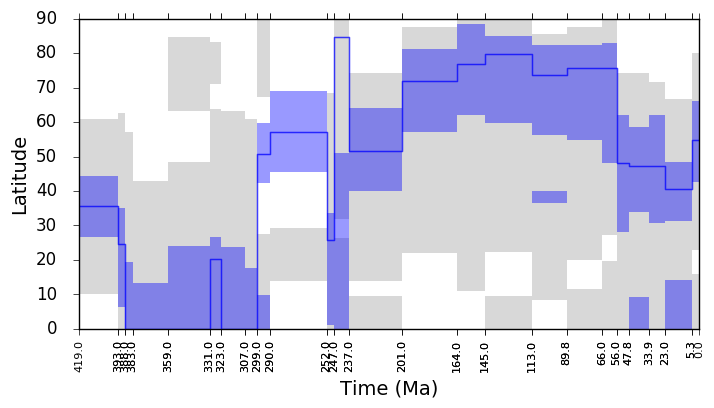

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))

# 95%
axes.fill_between(time,B95CI_2,B95CI_1,facecolor='grey',edgecolor='none',interpolate=False,alpha=0.3,label='Coals')
axes.fill_between(time,B95CI_4,B95CI_3,facecolor='grey',edgecolor='none',interpolate=False,alpha=0.3,label='Coals')

# 50%
axes.fill_between(time,B50CI_2,B50CI_1,facecolor='blue',edgecolor='none',interpolate=False,alpha=0.4,label='Coals')
axes.fill_between(time,B50CI_4,B50CI_3,facecolor='blue',edgecolor='none',interpolate=False,alpha=0.4,label='Coals')

axes.plot(time,data_C,'blue', alpha=0.5) #,linewidth=.0
axes.plot(time,data_C,'blue', alpha=0.5) #,linewidth=1

plt.xticks(np.hstack((data_peaks['FromAge'],data_peaks['ToAge'])),rotation=90,size=8) #, rotation=50,,verticalalignment='top'
axes.set_ylabel('Latitude', fontsize=14) 
axes.set_xlabel('Time (Ma)', fontsize=14) 
axes.set_xlim((419,0))
axes.set_ylim(ymin=0)
axes.xaxis.set_tick_params(direction='out')
axes.yaxis.set_tick_params(labelsize=12,direction='out')
axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('left')
#axes.legend()

plt.savefig('Output/Fig_12a.pdf')
plt.show()


## Figure 12b

### Read the data

In [7]:
# aplara = 50%
Boundary_50CI_1 = np.zeros(24)
Boundary_50CI_2 = np.zeros(24)
Boundary_50CI_3 = np.zeros(24)
Boundary_50CI_4 = np.zeros(24)

for i in np.arange(0,24,1):
    
    data_raw = pd.read_csv('../Data/HDR/9_3_Evaporites_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize5_Normalised/hdr_'+str(i)+'.csv')
    data = np.array(data_raw)
    Boundary_50CI_1[i] = -1*data[2,1]
    
    try:
        if np.float16(data[2,2]) != np.float16(-1*data[2,1]):
            Boundary_50CI_2[i] = -1*data[2,2]
    except IndexError:
        print 'sorry, no data'
        
    try:
        if np.float16(data[2,3]) != np.float16(-1*data[2,2]) and data[2,3] != None:
            Boundary_50CI_3[i]= -1*data[2,3]
    except IndexError:
        print 'sorry, no data'

print Boundary_50CI_1
print Boundary_50CI_2
print Boundary_50CI_3


# aplara = 95%
Boundary_95CI_1 = np.zeros(24)
Boundary_95CI_2 = np.zeros(24)
Boundary_95CI_3 = np.zeros(24)
Boundary_95CI_4 = np.zeros(24)

for i in np.arange(0,24,1):
    
    data_raw = pd.read_csv('../Data/HDR/9_3_Evaporites_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize5_Normalised/hdr_'+str(i)+'.csv')
    data = np.array(data_raw)
    
    Boundary_95CI_1[i] = -1*data[0,1]
    
    try:
        if np.float16(data[0,2]) != np.float16(-1*data[0,1]):
            Boundary_95CI_2[i] = -1*data[0,2]
    except IndexError:
        print 'sorry, no data'
        
    try:
        if np.float16(data[0,3]) != np.float16(-1*data[0,2]):
            Boundary_95CI_3[i] = -1*data[0,3]
    except IndexError:
        print 'sorry, no data'

print Boundary_95CI_1
print Boundary_95CI_2
print Boundary_95CI_3


sorry, no data
sorry, no data
sorry, no data
sorry, no data
sorry, no data
[ 17.54577731  32.9661596   31.88169191  32.23236462  38.75329368
  24.17631354  27.48048393  37.97567777  23.32142621  27.38103664
  27.91535641  19.55027784  21.11028119  23.16137201  33.11671109
  34.0156875   30.10264206  32.21682981  32.80621928  23.55958179
  42.51999283  45.15474357  44.57015651  43.60501884]
[  0.          11.60727048  10.97843096   9.87524266  13.84778556   0.
   3.28981488  19.80961245   0.           4.27114755   7.96813501   0.           0.
   1.10183254   9.36912012  11.02364509   7.68044744   8.75247125
   8.76237496   2.02967803  19.15976889  28.06265036  24.91555401
  24.48009794]
[ 0.          0.          0.          0.          0.          0.          0.
  8.26489103  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


### Data processing

In [9]:
B50CI_1 = np.zeros(len(Boundary_50CI_1)*2)
B50CI_1[::2] = Boundary_50CI_1[:]
B50CI_1[1::2] = Boundary_50CI_1[:]

B50CI_2 = np.zeros(len(Boundary_50CI_2)*2)
B50CI_2[::2] = Boundary_50CI_2[:]
B50CI_2[1::2] = Boundary_50CI_2[:]

B50CI_3 = np.zeros(len(Boundary_50CI_3)*2)
B50CI_3[::2] = Boundary_50CI_3[:]
B50CI_3[1::2] = Boundary_50CI_3[:]

B95CI_1 = np.zeros(len(Boundary_95CI_1)*2)
B95CI_1[::2] = Boundary_95CI_1[:]
B95CI_1[1::2] = Boundary_95CI_1[:]

B95CI_2 = np.zeros(len(Boundary_95CI_2)*2)
B95CI_2[::2] = Boundary_95CI_2[:]
B95CI_2[1::2] = Boundary_95CI_2[:]

B95CI_3 = np.zeros(len(Boundary_95CI_3)*2)
B95CI_3[::2] = Boundary_95CI_3[:]
B95CI_3[1::2] = Boundary_95CI_3[:]

### Make the figure

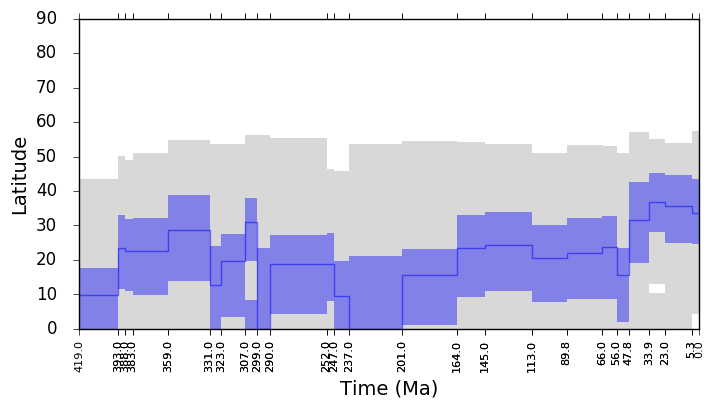

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))

# 95%
axes.fill_between(time,B95CI_2,B95CI_1,facecolor='grey',edgecolor='none',interpolate=False,alpha=0.3,label='Coals')
axes.fill_between(time,0,B95CI_3,facecolor='grey',edgecolor='none',interpolate=False,alpha=0.3,label='Coals')

# 50%
axes.fill_between(time,B50CI_2,B50CI_1,facecolor='blue',edgecolor='none',interpolate=False,alpha=0.4,label='Coals')
axes.fill_between(time,0,B50CI_3,facecolor='blue',edgecolor='none',interpolate=False,alpha=0.4,label='Coals')

# Evaporite peaks
data_E = np.zeros(len(data_peaks['Evaporites_Peak'])*2)
data_E[::2] = np.asarray(data_peaks['Evaporites_Peak'])
data_E[1::2] = np.asarray(data_peaks['Evaporites_Peak'])
axes.plot(time,data_E,'blue', alpha=0.5) #,linewidth=.0

plt.xticks(np.hstack((data_peaks['FromAge'],data_peaks['ToAge'])),rotation=90,size=8) #, rotation=50,,verticalalignment='top'
axes.set_ylabel('Latitude', fontsize=14) 
axes.set_xlabel('Time (Ma)', fontsize=14) 
axes.set_xlim((419,0))
axes.set_ylim((0,90))
axes.xaxis.set_tick_params(direction='out')
axes.yaxis.set_tick_params(labelsize=12,direction='out')
axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('left')
#axes.legend()

plt.savefig('Output/Fig_12b.pdf')
plt.show()


## Figure 12c

### Read the data

In [11]:
Boundary_50CI_1 = np.zeros(24)
Boundary_50CI_2 = np.zeros(24)
Boundary_50CI_3 = np.zeros(24)
Boundary_50CI_4 = np.zeros(24)

for i in np.arange(0,24,1):
    
    data_raw = '../Data/HDR/9_3_Glacial_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize5_Normalised/hdr_'+str(i)+'.csv'
    
    if os.path.isfile(data_raw):
        data_raw = pd.read_csv('../Data/HDR/9_3_Glacial_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize5_Normalised/hdr_'+str(i)+'.csv')
        data = np.array(data_raw)
        Boundary_50CI_1[i] = -1*data[2,1]

        try:
            if np.float16(data[2,2]) != np.float16(-1*data[2,1]):
                Boundary_50CI_2[i] = -1*data[2,2]
        except IndexError:
            print 'sorry, no data'

        try:
            if np.float16(data[2,3]) != np.float16(-1*data[2,2]) and data[2,3] != None:
                Boundary_50CI_3[i]= -1*data[2,3]
        except IndexError:
            print 'sorry, no data'

print Boundary_50CI_1
print Boundary_50CI_2
print Boundary_50CI_3


# aplara = 95%
Boundary_95CI_1 = np.zeros(24)
Boundary_95CI_2 = np.zeros(24)
Boundary_95CI_3 = np.zeros(24)
Boundary_95CI_4 = np.zeros(24)

for i in np.arange(0,24,1):
    
    data_raw = '../Data/HDR/9_3_Glacial_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize5_Normalised/hdr_'+str(i)+'.csv'
    if os.path.isfile(data_raw):
        
        data_raw = pd.read_csv('../Data/HDR/9_3_Glacial_Matthews2016_TwoBiasRemoved_CorrectedBeforeFlipping_Flipped_Doubled_BinningSize5_Normalised/hdr_'+str(i)+'.csv')
        data = np.array(data_raw)

        Boundary_95CI_1[i] = -1*data[0,1]

        try:
            if np.float16(data[0,2]) != np.float16(-1*data[0,1]):
                Boundary_95CI_2[i] = -1*data[0,2]
        except IndexError:
            print 'sorry, no data'
        
        try:
            if np.float16(data[0,3]) != np.float16(-1*data[0,2]) and data[0,3] != None:
                Boundary_95CI_3[i]= -1*data[0,3]
        except IndexError:
            print 'sorry, no data'

print Boundary_95CI_1
print Boundary_95CI_2
print Boundary_95CI_3


[  0.           0.           0.          70.71754806  62.98392173
  74.38792473  57.50718736  67.96171087  72.43393759  78.60706296   0.           0.
   0.          90.          90.          77.81199372   0.          90.
  67.73698918  74.50583019  65.21246729  74.27551004  67.52500058  90.        ]
[  0.           0.           0.          51.2482926   40.15751137
  60.24200905  39.92471414  47.51623601  52.81893907  65.6053133    0.           0.
   0.          83.83793437  80.18972858  66.42286602   0.          74.911144
  46.70817552  60.0926771   49.47543935  58.99725668  48.7721411
  75.78811211]
[ 0.          0.          0.          0.          3.52716198  0.          0.
  6.70597804  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


### Data processing

In [13]:
B50CI_1 = np.zeros(len(Boundary_50CI_1)*2)
B50CI_1[::2] = Boundary_50CI_1[:]
B50CI_1[1::2] = Boundary_50CI_1[:]

B50CI_2 = np.zeros(len(Boundary_50CI_2)*2)
B50CI_2[::2] = Boundary_50CI_2[:]
B50CI_2[1::2] = Boundary_50CI_2[:]

B50CI_3 = np.zeros(len(Boundary_50CI_3)*2)
B50CI_3[::2] = Boundary_50CI_3[:]
B50CI_3[1::2] = Boundary_50CI_3[:]

B95CI_1 = np.zeros(len(Boundary_95CI_1)*2)
B95CI_1[::2] = Boundary_95CI_1[:]
B95CI_1[1::2] = Boundary_95CI_1[:]

B95CI_2 = np.zeros(len(Boundary_95CI_2)*2)
B95CI_2[::2] = Boundary_95CI_2[:]
B95CI_2[1::2] = Boundary_95CI_2[:]

B95CI_3 = np.zeros(len(Boundary_95CI_3)*2)
B95CI_3[::2] = Boundary_95CI_3[:]
B95CI_3[1::2] = Boundary_95CI_3[:]


### Make the figure

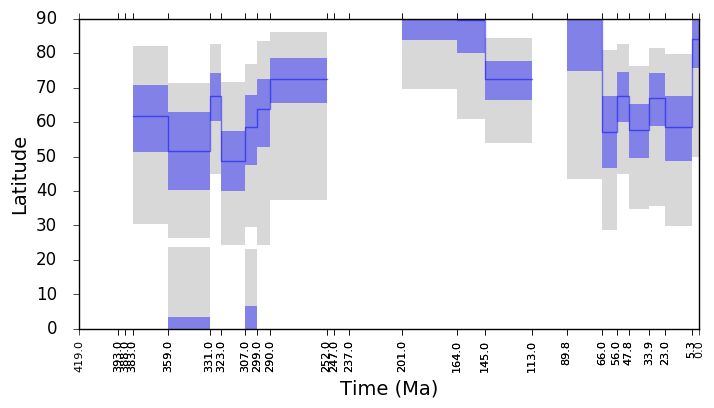

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))
# 95%
axes.fill_between(time,B95CI_2,B95CI_1,facecolor='grey',edgecolor='none',interpolate=False,alpha=0.3,label='Coals')
axes.fill_between(time,0,B95CI_3,facecolor='grey',edgecolor='none',interpolate=False,alpha=0.3,label='Coals')

# 50%
axes.fill_between(time,B50CI_2,B50CI_1,facecolor='blue',edgecolor='none',interpolate=False,alpha=0.4,label='Coals')
axes.fill_between(time,0,B50CI_3,facecolor='blue',edgecolor='none',interpolate=False,alpha=0.4,label='Coals')

# glacial deposits peaks
data_G = np.zeros(len(data_peaks['Evaporites_Peak'])*2)
data_G[::2] = np.asarray(data_peaks['Glacial_Peak'])
data_G[1::2] = np.asarray(data_peaks['Glacial_Peak'])

axes.plot(time,data_G,'b', alpha=0.5)

plt.xticks(np.hstack((data_peaks['FromAge'],data_peaks['ToAge'])),rotation=90,size=8) #, rotation=50,,verticalalignment='top'
axes.set_ylabel('Latitude', fontsize=14) 
axes.set_xlabel('Time (Ma)', fontsize=14) 
axes.set_xlim((419,0))
axes.set_ylim(ymin=0)
axes.xaxis.set_tick_params(direction='out')
axes.yaxis.set_tick_params(labelsize=12,direction='out')
axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('left')
#axes.legend()

plt.savefig('Output/Fig_12c.pdf')
plt.show()


## Figure 12d

### Read the data and make the figure

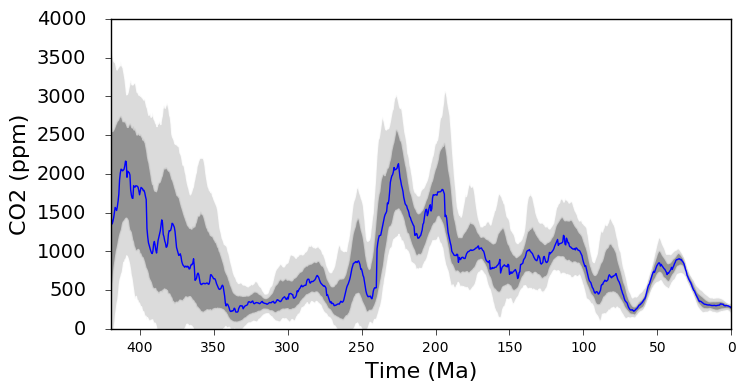

In [15]:
# read CO2 data
data_CO2 = pd.read_excel('../Data/Fig12/ncomms14845-s3_copy.xlsx')
#data_CO2['lw95%']

fig, ax = plt.subplots(figsize=(8,4))

ax.fill_between(data_CO2['Age (Ma)'],data_CO2['lw95%'],data_CO2['up95%'],facecolor='lightgrey',alpha=0.8,edgecolor='white',interpolate=True)
ax.fill_between(data_CO2['Age (Ma)'],data_CO2['lw68%'],data_CO2['up68%'],facecolor='grey',alpha=0.8,edgecolor='lightgrey',interpolate=True)

ax.plot(data_CO2['Age (Ma)'],data_CO2['pCO2 probability maximum'],c='blue', alpha=1)

ax.set_ylabel('CO2 (ppm)', fontsize=16) 
ax.set_xlabel('Time (Ma)', fontsize=16) 
ax.set_xlim((419,0))
ax.set_ylim(ymin=0)
ax.xaxis.set_tick_params(direction='out')
ax.yaxis.set_tick_params(labelsize=14,direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('Output/Fig_12d.pdf')
plt.show()


## Figure 12e

### Read the data

In [16]:
# Read input data

mY_raw = pd.read_excel('../Data/Fig12/m_filpped_addup.xlsx')
m = np.array(mY_raw)

lmY_raw = pd.read_excel('../Data/Fig12/lm_filpped_addup.xlsx')
lm = np.array(lmY_raw)

i_raw = pd.read_excel('../Data/Fig12/Ice_filpped_addup.xlsx')
Ice = np.array(i_raw)

sm_raw = pd.read_excel('../Data/Fig12/sm_filpped_addup.xlsx')
sm = np.array(sm_raw)

elY_raw = pd.read_excel('../Data/Fig12/el_filpped_addup.xlsx')
el = np.array(elY_raw)

print sm
print ''
print el
print ''
print sm+el

[[3584 4613 3897 3665 4051 4720 3536 5326 4104 2653 3098 2429 2615 1976
  1581 3726 4819 2882 2240 3944 3163 3567 4586 6003]
 [3770 3778 4489 3784 4120 4477 4224 3544 4410 3311 3650 4398 2903 3979
  2779 2600 4070 3249 3836 4132 5111 4612 4083 5239]
 [2960 3787 4936 4491 4183 4406 4831 4757 4557 3473 4070 4145 3211 4727
  3595 2758 2794 2476 3298 4153 6343 6557 5322 7107]
 [3139 3686 3663 3722 4285 4485 5334 5362 4473 3245 3095 4174 3548 3428
  2435 3514 3035 2916 3372 3514 7037 9542 6932 6598]
 [2720 3508 3670 4535 4316 3522 3796 4152 4444 3900 2349 2933 2941 4224
  2790 3639 4817 4538 4403 4338 3947 4197 6302 4299]
 [2608 2787 2418 2617 2995 2821 2911 2829 3348 4732 3496 2178 2453 4348
  3581 1903 2410 2599 3970 3851 2123 2064 3838 2787]
 [2005 1979 2172 2398 3751 3287 3227 3643 4070 2854 2407 3261 3627 3801
  2396 2457 1884 1915 2554 2756  247 1119 1870 1358]
 [2392 1761 1647 2366 1781 1576 2312 2775 2476 2832 2774 2414 3427 1540
  1381 1077 1823 1799 1253  716  455  521 1097  509]


### Make the figure

[   2.   11.   11.   20.   20.   29.   29.   37.   37.   49.   49.   58.
   58.   81.   81.   94.   94.  117.  117.  135.  135.  146.  146.  166.
  166.  179.  179.  203.  203.  224.  224.  248.  248.  269.  269.  285.
  285.  296.  296.  323.  323.  338.  338.  359.  359.  380.  380.  402.]


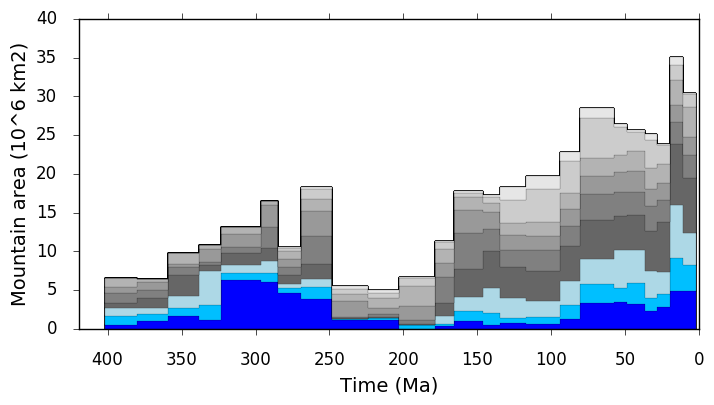

In [17]:
fig, axes = plt.subplots(figsize=(8, 4))

Data1 = pd.read_excel('../Data/Fig12/Timescale.xlsx', delimiter=',')  
TimeStep = np.zeros(len(Data1['From_age'])*2)
TimeStep[::2] = Data1['To_age']
TimeStep[1::2] = Data1['From_age']
print TimeStep

for i in np.arange(0,24,1):
    
    #latitude, specify the bin size
    yedges = np.arange(0, 91, 5)
    # time steps
    time = [6,14,22,33,43,53,76,90,105,126,140,152,169,195,218,232,255,277,287,302,328,348,368,396]
    # mountain color scheme
    cmap = ['blue','deepskyblue','lightblue',(0.4,0.4,0.4),(0.5,0.5,0.5),(0.6,.6,.6),(0.7,0.7,0.7),(0.8,0.8,0.8),(0.9,0.9,0.9)]    
        
    y_all = np.zeros((9,len(np.float64(m[0])/196608*510)*2))
    
    for i in np.arange(0,9,1):
        y = np.zeros(len(np.float64(m[i])/196608*510)*2)
        y[::2] = np.float64(m[i])/196608*510
        y[1::2] = np.float64(m[i])/196608*510
        y_all[i] = y
    
    # x-axis: time intervals
    axes.stackplot(TimeStep, y_all,colors=cmap,linewidth=0.1) #edgecolor='grey', , cmap='winter'
    
    axes.set_xlim((419,0))
    axes.set_ylim(ymin=0)
    axes.set_ylabel('Mountain area (10^6 km2)',size=14)
    axes.set_xlabel('Time (Ma)',size=14)
    
    axes.xaxis.set_tick_params(labelsize=12,direction='out')
    plt.setp(axes.get_xticklabels(), fontsize=12.) #,rotation=50

    axes.yaxis.set_tick_params(labelsize=12,direction='out')
    axes.xaxis.set_ticks_position('both')
    axes.yaxis.set_ticks_position('left')
    
plt.savefig('Output/Fig_12e.pdf',dpi=600)
plt.show()


## Figure 12f

### Make the figure

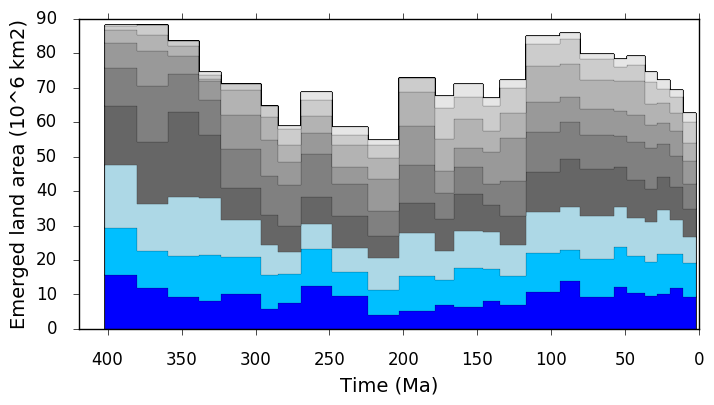

In [18]:
fig, axes = plt.subplots(figsize=(8, 4))

for i in np.arange(0,24,1):
    
    #latitude, specify the bin size
    yedges = np.arange(0, 91, 5) 
    # time steps
    time = [6,14,22,33,43,53,76,90,105,126,140,152,169,195,218,232,255,277,287,302,328,348,368,396]
    # shallow marine color scheme
    cmap = ['blue','deepskyblue','lightblue',(0.4,0.4,0.4),(0.5,0.5,0.5),(0.6,.6,.6),(0.7,0.7,0.7),(0.8,0.8,0.8),(0.9,0.9,0.9)]    

    y_all = np.zeros((9,len(np.float64(sm[0])/196608*510)*2))
    
    for i in np.arange(0,9,1):
        y = np.zeros(len(np.float64(sm[i])/196608*510)*2)
        y[::2] = np.float64(sm[i])/196608*510
        y[1::2] = np.float64(sm[i])/196608*510
        y_all[i] = y
    
    axes.stackplot(TimeStep, y_all,colors=cmap,linewidth=0.1) #edgecolor='grey', , cmap='winter'

    axes.set_xlim((419,0))
    axes.set_ylim(ymin=0)
    axes.set_ylabel('Emerged land area (10^6 km2)',size=14)
    axes.set_xlabel('Time (Ma)',size=14)
    
    axes.xaxis.set_tick_params(labelsize=12,direction='out')
    plt.setp(axes.get_xticklabels(), fontsize=12.) #,rotation=50

    axes.yaxis.set_tick_params(labelsize=12,direction='out')
    axes.xaxis.set_ticks_position('both')
    axes.yaxis.set_ticks_position('left')
    
plt.savefig('Output/Fig_12f.pdf',dpi=600)
plt.show()


## Figure 12g

### Make the figure

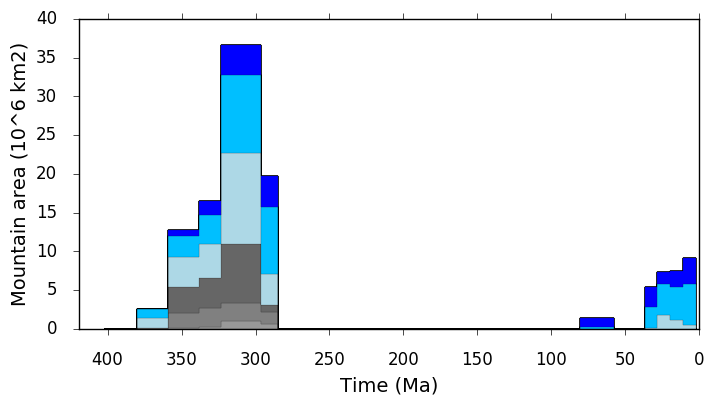

In [19]:
fig, axes = plt.subplots(figsize=(8, 4))

for i in np.arange(0,24,1):
    
    yedges = np.arange(0, 91, 5) #latitude, specify the bin size
    time = [6,14,22,33,43,53,76,90,105,126,140,152,169,195,218,232,255,277,287,302,328,348,368,396]
    
    # ice sheet
    cmap = [(0.9,0.9,0.9),(0.8,0.8,0.8),(0.7,0.7,0.7),(0.6,.6,.6),(0.5,0.5,0.5),(0.4,0.4,0.4),'lightblue','deepskyblue','blue']
    
    y_all = np.zeros((9,len(np.float64(Ice[0])/196608*510)*2))
    
    for i in np.arange(0,9,1):
        y = np.zeros(len(np.float64(Ice[i])/196608*510)*2)
        y[::2] = np.float64(Ice[i])/196608*510
        y[1::2] = np.float64(Ice[i])/196608*510
        y_all[i] = y
    
    # x-axis: time intervals
    axes.stackplot(TimeStep, y_all,colors=cmap,linewidth=0.1) #edgecolor='grey', , cmap='winter'
    
    axes.set_xlim((419,0))
    axes.set_ylim(ymin=0)
    axes.set_ylabel('Mountain area (10^6 km2)',size=14)
    axes.set_xlabel('Time (Ma)',size=14)
    
    axes.xaxis.set_tick_params(labelsize=12,direction='out')
    plt.setp(axes.get_xticklabels(), fontsize=12.) #,rotation=50

    axes.yaxis.set_tick_params(labelsize=12,direction='out')
    axes.xaxis.set_ticks_position('both')
    axes.yaxis.set_ticks_position('left')
    
plt.savefig('Output/Fig_12g.pdf',dpi=600)
plt.show()

## Figure 12h

### Make the figure

[ 419.   393.   393.   388.   388.   383.   383.   359.   359.   331.   331.
  323.   323.   307.   307.   299.   299.   290.   290.   252.   252.   247.
  247.   237.   237.   201.   201.   164.   164.   145.   145.   113.   113.
   89.8   89.8   66.    66.    56.    56.    47.8   47.8   33.9   33.9
   23.    23.     5.3    5.3    0. ]


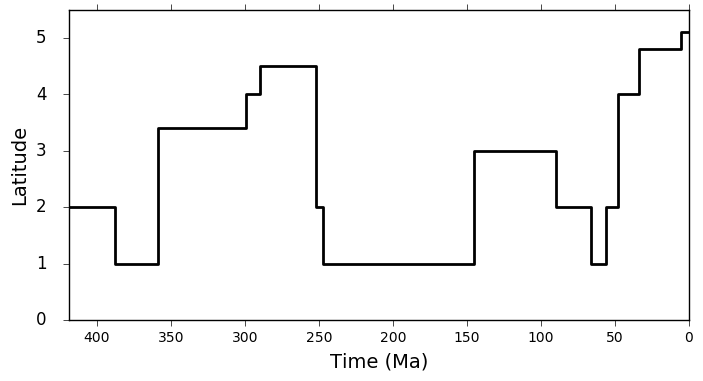

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))

# input data
data = pd.read_csv('../Data/Fig12/Boucot_etal_2013_Book_ClimateGradients.csv')

grad = np.zeros(len(data['Dataset y'][7::1])*2)
grad[::2] = data['Dataset y'][7::1]
grad[1::2] = data['Dataset y'][7::1]

# time 
data_peaks = pd.read_excel('../Data/Fig12/PeakLatitude_EachMap.xlsx')
time = np.zeros(len(data_peaks['FromAge'])*2)
time[::2] = data_peaks['FromAge']
time[1::2] = data_peaks['ToAge']
print time

axes.plot(time,grad,linewidth=2,color='black')
#plt.xticks(np.hstack((data_time['FromAge'],data_time['ToAge'])),rotation=90,size=8) #, rotation=50,,verticalalignment='top'

axes.set_ylim((0,5.5))
axes.set_xlim((419,0))
axes.set_ylabel('Latitude', fontsize=14) 
axes.set_xlabel('Time (Ma)', fontsize=14) 
axes.set_xlim((419,0))
axes.set_ylim(ymin=0)
axes.xaxis.set_tick_params(direction='out')
axes.yaxis.set_tick_params(labelsize=12,direction='out')
axes.xaxis.set_ticks_position('both')
axes.yaxis.set_ticks_position('left')
#axes.grid(True)

plt.savefig('Output/Fig_12h.pdf')
plt.show()
